In [53]:
%matplotlib inline
import utils
reload(utils)

<module 'utils' from 'utils.py'>

Loading data from us sample

In [7]:

%time X_us_train, X_us_test, y_us_train, y_us_test = utils.LoadDataset('data_0901/data20to26/US', 0.33)
%time X_iran_train, X_iran_test, y_iran_train, y_iran_test = utils.LoadDataset('data_0901/data20to26/Iran', 0.33)

CPU times: user 7.54 s, sys: 1.54 s, total: 9.08 s
Wall time: 9.09 s
CPU times: user 11.5 s, sys: 4.09 s, total: 15.6 s
Wall time: 17.7 s


Train random forest models

In [8]:
from sklearn.ensemble import RandomForestClassifier
rndf_us = RandomForestClassifier(n_estimators=30, max_depth=None,min_samples_split=10, random_state=0)
%time rndf_us = rndf_us.fit(X_us_train, y_us_train)
rndf_iran = RandomForestClassifier(n_estimators=30, max_depth=None,min_samples_split=10, random_state=0)
%time rndf_iran = rndf_iran.fit(X_iran_train, y_iran_train)

CPU times: user 2min 39s, sys: 908 ms, total: 2min 40s
Wall time: 2min 40s
CPU times: user 6min 50s, sys: 1.16 s, total: 6min 51s
Wall time: 6min 52s


Evaluate classifiers

In [ ]:

print "Us on US", utils.classifierMetrics(rndf_us, X_us_test, y_us_test), "Iran on US", utils.classifierMetrics(rndf_us, X_iran_test, y_iran_test)
print "Iran on Iran", utils.classifierMetrics(rndf_iran, X_iran_test, y_iran_test), "US on Iran",utils.classifierMetrics(rndf_iran, X_iran_test, y_iran_test)


Feature importance

In [21]:
feature_names=["same_country","same_locale","gender_mm,gender_mf","gender_mu","gender_fm","gender_ff","gender_fu",
               "gender_um","gender_uf","gender_uu","gender_m","gender_f","gender_u","picture_daily","update_profile_daily",
               "wink_daily","picture_30days","num_face","age","beauty","bright","sharp","white","indian","asian","distance",
               "fav_ratio"]
ftrs = [(n, s1, s2) for (n, s1, s2) in zip(feature_names, rndf_us.feature_importances_, rndf_iran.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US", "Iran"))

Feature,US,Iran
picture_30days,0.201930043533,0.237854163252
fav_ratio,0.199992267451,0.241582293873
update_profile_daily,0.0954007149414,0.115239168815
beauty,0.068056166397,0.0451558980199
bright,0.0675870254709,0.0430825484711
wink_daily,0.0669476222313,0.0784726964646
sharp,0.0534149596199,0.0336258201058
white,0.0416683152494,0.0276792801846
indian,0.0281426825517,0.0205560478724
distance,0.0214209021005,0.00921413576805


Precision Recall curves

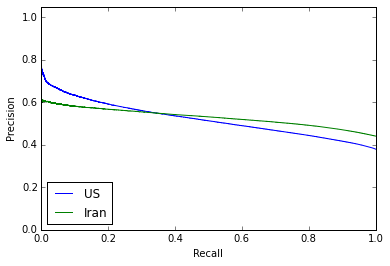

In [26]:
from sklearn.metrics import precision_recall_curve
y_us_score = rndf_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
y_iran_score = rndf_us.predict_proba(X_iran_test)
precision_iran, recall_iran, _ = precision_recall_curve(y_iran_test, y_iran_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),(recall_iran, precision_iran, "Iran")))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_us = LogisticRegression(penalty='l2')
%time lr_us= lr_us.fit(X_us_train, y_us_train)
print "US", utils.classifierMetrics(lr_us, X_us_test, y_us_test)
lr_iran = LogisticRegression(penalty='l2')
%time lr_iran= lr_iran.fit(X_iran_train, y_iran_train)
print "Iran", utils.classifierMetrics(lr_iran, X_iran_test, y_iran_test)

In [40]:
lr_us.coef_[0,:]
ftrs = [(n, s1, s2) for (n, s1, s2) in zip(feature_names, lr_us.coef_[0,:], lr_iran.coef_[0,:])]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US", "Iran"))

Feature,US,Iran
fav_ratio,1.44463000029,0.874731411073
gender_ff,0.541891554621,0.186453512939
bright,0.411450454996,0.394095351131
gender_uf,0.245155074601,-0.20024832963
num_face,0.147820635923,0.0848038899369
same_locale,0.0761271342531,-0.0680560592796
gender_u,0.0345773235963,0.104418829241
sharp,0.0247681330387,-0.405806003273
same_country,0.0216413776541,0.339399701704
picture_daily,0.021286343026,0.111744465342


GB Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_us = GradientBoostingClassifier()
%time gb_us= gb_us.fit(X_us_train, y_us_train)
print "US", gb_us.score(X_us_test, y_us_test)
gb_iran = GradientBoostingClassifier()
%time gr_iran= gb_iran.fit(X_iran_train, y_iran_train)
print "Iran", utils.classifierMetrics(gb_iran, X_iran_test, y_iran_test)

In [43]:
ftrs = [(n, s1, s2) for (n, s1, s2) in zip(feature_names, gb_us.feature_importances_, gb_iran.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US", "Iran"))

Feature,US,Iran
picture_30days,0.219050143378,0.253608956017
fav_ratio,0.173189328563,0.18358176008
bright,0.100346085671,0.084890865389
beauty,0.098175137295,0.112697113769
white,0.0444810255,0.0332952666386
same_locale,0.0409434592805,0.00295084559298
update_profile_daily,0.0323355996917,0.0428291113021
gender_f,0.0291021287271,0.0313271384771
gender_ff,0.025841051288,0.00513157641299
wink_daily,0.0239768731311,0.0436384577863


In [ ]:
y_us_score = gb_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
y_iran_score = gb_us.predict_proba(X_iran_test)
precision_iran, recall_iran, _ = precision_recall_curve(y_iran_test, y_iran_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),(recall_iran, precision_iran, "Iran")))